![download%20%2833%29.png](attachment:download%20%2833%29.png)

In [2]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from string import punctuation

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)
%matplotlib inline
bin_size=10
plt.rcParams.update({'figure.max_open_warning': 0})
# pd.set_option("max_rows", 30)
%pprint = False

Pretty printing has been turned OFF


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nihaalz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
feb_27 = pd.read_csv('archive/February/UkraineCombinedTweetsDeduped_FEB27.csv')
feb_28_pt1 =  pd.read_csv('archive/February/UkraineCombinedTweetsDeduped_FEB28_part1.csv')
feb_28_pt2 =  pd.read_csv('archive/February/UkraineCombinedTweetsDeduped_FEB28_part2.csv')
mar_19 = pd.read_csv('archive/March/UkraineCombinedTweetsDeduped_MAR19.csv')
mar_21 = pd.read_csv('archive/March/UkraineCombinedTweetsDeduped_MAR21.csv')
mar_31 = pd.read_csv('archive/March/UkraineCombinedTweetsDeduped_MAR31.csv')

/var/folders/kq/sgj1fw1j2c9_ttnhs0l53fk40000gn/T/ipykernel_12750/3452890731.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  feb_28_pt1 =  pd.read_csv('archive/February/UkraineCombinedTweetsDeduped_FEB28_part1.csv')


In [101]:
df = pd.concat([feb_27, feb_28_pt1,feb_28_pt2,mar_19,mar_21,mar_31], axis=0)

Keeping all the rows where the comments are in english and the comment has a location

In [102]:
df = df[(~df['location'].isnull()) & (df['language']=='en')]

In [103]:
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131
4,1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,2013-08-04 21:07:08.000000,1497724980653694976,2022-02-27 00:07:16,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0,2022-02-27 00:09:33.043812
5,1141805,2191952909,WyvernReports,"In war, truth is the first casualty. Focus #Sy...",The Blue Marble,700,6424,20689,2013-11-22 21:51:19.000000,1497724980833968129,2022-02-27 00:07:16,565,russian troops destroyed a commercial oil base...,[],en,NaN,0,2022-02-27 00:09:33.035798
8,1141808,23611466,isunja,NaN,"Göteborg, Sweden",710,219,1328,2009-03-10 16:23:20.000000,1497724981157023749,2022-02-27 00:07:16,53,Some scenes from #Kyiv this morning: The build...,"[{'text': 'Kyiv', 'indices': [32, 37]}]",en,NaN,0,2022-02-27 00:09:33.003577
9,1141809,875055153157722112,manonatelier,WordPress • Designer Dork • Art Lover • Hometo...,NY/PA,2779,582,116858,2017-06-14 18:19:41.000000,1497724981538660357,2022-02-27 00:07:16,40,Meanwhile American “intelligence” pretended an...,[],en,NaN,0,2022-02-27 00:09:32.995537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344502,344502,121843410,Ralph42x,"👨‍💻, vegan 🌱, music 🎹, cats 😺, Birds, Nature, ...",Bayern,656,166,54558,2010-03-10 19:38:06.000000,1509677715972145157,2022-03-31 23:43:10.000000,44,I'll be joining @Lawrence tonight on @TheLastW...,"[{'text': 'Putin', 'indices': [130, 136]}]",en,NaN,0,2022-03-31 23:43:57.856967
344503,344503,15794515,LuckyPeanut,Life is short ... make every day a good day. B...,"Omaha, NE",2006,253,6974,2008-08-10 02:28:16.000000,1509677716592803853,2022-03-31 23:43:10.000000,233,"We’ve lost already thousands of people killed,...",[],en,NaN,0,2022-03-31 23:43:57.850081
344506,344506,787156255089360896,Anarcho_Suburbo,You would make as many typos as me if you had ...,"Canterbury Region, Aotearoa",2436,1295,69526,2016-10-15 05:00:50.000000,1509677720388931589,2022-03-31 23:43:11.000000,2845,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-03-31 23:43:57.829457
344507,344507,863000459576881152,snarky_op,COUNTRY B4 PARTY!!⚖️\nRussian-Orthodox-LifeLon...,"North Logan, UT",5001,4101,418594,2017-05-12 11:58:38.000000,1509677720514433028,2022-03-31 23:43:11.000000,16,"Amb. William Taylor, former U.S. Ambassador to...","[{'text': 'Ukraine', 'indices': [63, 71]}]",en,NaN,0,2022-03-31 23:43:57.822572


Clean the text to be used for analysis

In [104]:
def processComment(comment):
    # Remove HTML special entities (e.g. &amp;)
    comment = re.sub(r'\&\w*;', '', str(comment))
    #Convert @username to AT_USER
    comment = re.sub('@[^\s]+','', comment)
    # Remove tickers
    comment = re.sub(r'\$\w*', '', comment)
    # To lowercase
    comment = comment.lower()
    # Remove hyperlinks
    comment = re.sub(r'https?:\/\/.*\/\w*', '', comment)
    # Remove hashtags
    comment = re.sub(r'#\w*', '', comment)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    comment = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', comment)
    # Remove words with 2 or fewer letters
    comment = re.sub(r'\b\w{1,2}\b', '', comment)
    # Remove whitespace (including new line characters)
    comment = re.sub(r'\s\s+', ' ', comment)
    # Remove single space remaining at the front of the comment.
    #comment = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    comment = ''.join(c for c in comment if c <= '\uffff') 
    return comment

In [105]:
df['clean_text'] = df['text'].apply(lambda x: processComment(x) )

In [106]:
df = df.drop(['Unnamed: 0',
              'userid',
              'username',
              'usercreatedts',
              'tweetid',
              'tweetcreatedts',
              'language'],
             axis=1) 
             #'extractedts'],axis=1)
             

In [107]:
df['clean_acct_desc'] = df['acctdesc'].apply(lambda x: processComment(x) )

In [108]:
df

,acctdesc,location,following,followers,totaltweets,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,clean_text,clean_acct_desc
0,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",NaN,0,2022-02-27 00:09:33.084131,captured russian soldiers they said what thei...,just like everyone else the universe experien...
4,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",NaN,0,2022-02-27 00:09:33.043812,ukrainian soldiers wearing sunflowers their ha...,addicted news music cooking gardens outdoors t...
5,"In war, truth is the first casualty. Focus #Sy...",The Blue Marble,700,6424,20689,565,russian troops destroyed a commercial oil base...,[],NaN,0,2022-02-27 00:09:33.035798,russian troops destroyed commercial oil base n...,war truth the first casualty focus contributo...
8,NaN,"Göteborg, Sweden",710,219,1328,53,Some scenes from #Kyiv this morning: The build...,"[{'text': 'Kyiv', 'indices': [32, 37]}]",NaN,0,2022-02-27 00:09:33.003577,some scenes from this morning the building lob...,nan
9,WordPress • Designer Dork • Art Lover • Hometo...,NY/PA,2779,582,116858,40,Meanwhile American “intelligence” pretended an...,[],NaN,0,2022-02-27 00:09:32.995537,meanwhile american “intelligence” pretended em...,wordpress • designer dork • art lover • hometo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344502,"👨‍💻, vegan 🌱, music 🎹, cats 😺, Birds, Nature, ...",Bayern,656,166,54558,44,I'll be joining @Lawrence tonight on @TheLastW...,"[{'text': 'Putin', 'indices': [130, 136]}]",NaN,0,2022-03-31 23:43:57.856967,joining tonight around 1030 discuss the appar...,‍ vegan music cats birds nature fight clima...
344503,Life is short ... make every day a good day. B...,"Omaha, NE",2006,253,6974,233,"We’ve lost already thousands of people killed,...",[],NaN,0,2022-03-31 23:43:57.850081,’ lost already thousands people killed ’ lost ...,life short make every day good day kind respec...
344506,You would make as many typos as me if you had ...,"Canterbury Region, Aotearoa",2436,1295,69526,2845,⚡The Ukrainian Air Force would like to address...,[],NaN,0,2022-03-31 23:43:57.829457,⚡the ukrainian air force would like address mi...,you would make many typos you had sausages for...
344507,COUNTRY B4 PARTY!!⚖️\nRussian-Orthodox-LifeLon...,"North Logan, UT",5001,4101,418594,16,"Amb. William Taylor, former U.S. Ambassador to...","[{'text': 'Ukraine', 'indices': [63, 71]}]",NaN,0,2022-03-31 23:43:57.822572,amb william taylor former ambassador putin whe...,country party ⚖️\nrussian orthodox lifelongdem...


Wordcloud to understand the types of people who are tweeting (account descriptions) - Profile of people tweeting: Students, mainly female (because of she/her in bio), democratic, conservative, writers, liberal etc

In [109]:
import pandas as pd
import numpy as np 
from string import punctuation
from textblob import TextBlob
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
import re

In [110]:
big_string= df.clean_acct_desc.str.cat(sep='')

In [111]:
stopwords = ['and','not','are mine','are the','around the','with','are','the','from','nan','just','you are',
            'views are','all the','since','what you']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

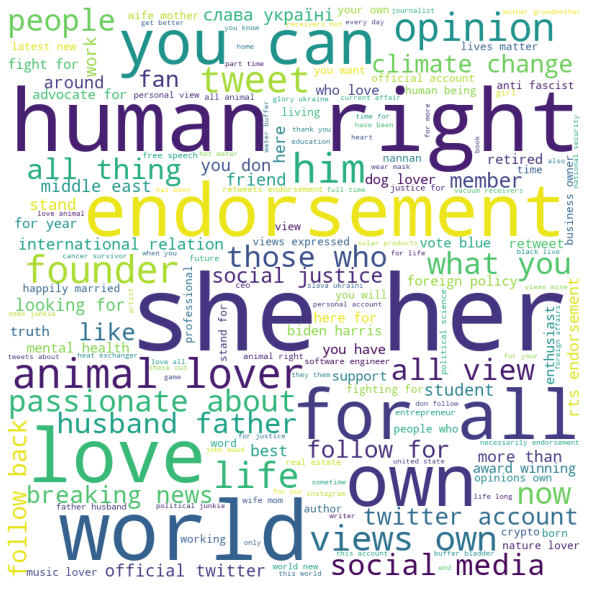

In [112]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Where are people tweeting from? 

In [113]:
big_string= df.location.str.cat(sep='')

In [114]:
stopwords = ['and','the','of','in','her','me','Land of','in my']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

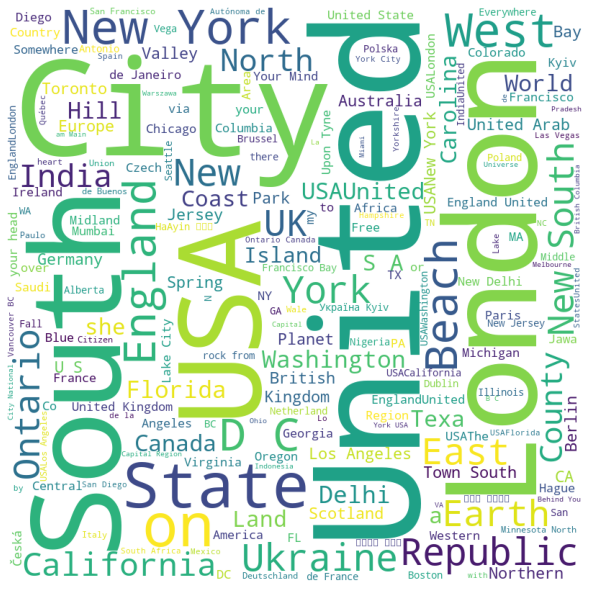

In [115]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:>

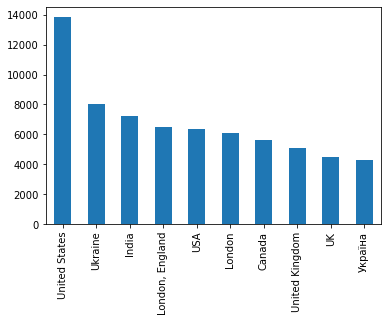

In [116]:
df['location'].value_counts()[:10].plot(kind='bar')

Labelling our data using textBlob to find sentiment of the tweets

In [117]:
from textblob import TextBlob
def get_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment
    return sentiment.polarity, sentiment.subjectivity

df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [118]:
df['polarity'] = df['sentiment'].apply(lambda x:x[0])
df['subjectivity'] = df['sentiment'].apply(lambda x:x[1])

In [119]:
def round_sentiment(unrounded):
    if(unrounded > 0):
        return 1
    elif(unrounded == 0):
        return 0 
    else:
        return -1 
    

In [120]:
df['sentiment_val'] = df['polarity'].apply(round_sentiment)

<AxesSubplot:title={'center':'Sentiment breakdown for dataset'}, ylabel='sentiment_val'>

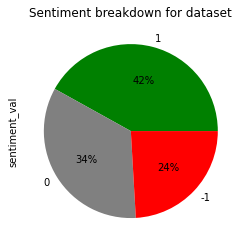

In [121]:
df.sentiment_val.value_counts().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['green', 'gray', 'red'],
                                title='Sentiment breakdown for dataset')

In [122]:
df.head()

,acctdesc,location,following,followers,totaltweets,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,clean_text,clean_acct_desc,sentiment,polarity,subjectivity,sentiment_val
0,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",NaN,0,2022-02-27 00:09:33.084131,captured russian soldiers they said what thei...,just like everyone else the universe experien...,"(0.3, 0.5)",0.30,0.5,1
4,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",NaN,0,2022-02-27 00:09:33.043812,ukrainian soldiers wearing sunflowers their ha...,addicted news music cooking gardens outdoors t...,"(0.0, 0.0)",0.00,0.0,0
5,"In war, truth is the first casualty. Focus #Sy...",The Blue Marble,700,6424,20689,565,russian troops destroyed a commercial oil base...,[],NaN,0,2022-02-27 00:09:33.035798,russian troops destroyed commercial oil base n...,war truth the first casualty focus contributo...,"(-0.05000000000000001, 0.5)",-0.05,0.5,-1
8,NaN,"Göteborg, Sweden",710,219,1328,53,Some scenes from #Kyiv this morning: The build...,"[{'text': 'Kyiv', 'indices': [32, 37]}]",NaN,0,2022-02-27 00:09:33.003577,some scenes from this morning the building lob...,nan,"(-0.2, 0.4)",-0.20,0.4,-1
9,WordPress • Designer Dork • Art Lover • Hometo...,NY/PA,2779,582,116858,40,Meanwhile American “intelligence” pretended an...,[],NaN,0,2022-02-27 00:09:32.995537,meanwhile american “intelligence” pretended em...,wordpress • designer dork • art lover • hometo...,"(0.5, 0.5)",0.50,0.5,1


In [123]:
df.sentiment_val.value_counts()

 1    336936
 0    273033
-1    193504
Name: sentiment_val, dtype: int64

In [124]:
df_positive = df[df.sentiment_val == 1]
df_neutral = df[df.sentiment_val == 0]
df_negative = df[df.sentiment_val == -1]

In [125]:
df_positive

,acctdesc,location,following,followers,totaltweets,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,clean_text,clean_acct_desc,sentiment,polarity,subjectivity,sentiment_val
0,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",NaN,0,2022-02-27 00:09:33.084131,captured russian soldiers they said what thei...,just like everyone else the universe experien...,"(0.3, 0.5)",0.300000,0.500000,1
9,WordPress • Designer Dork • Art Lover • Hometo...,NY/PA,2779,582,116858,40,Meanwhile American “intelligence” pretended an...,[],NaN,0,2022-02-27 00:09:32.995537,meanwhile american “intelligence” pretended em...,wordpress • designer dork • art lover • hometo...,"(0.5, 0.5)",0.500000,0.500000,1
14,Trying to make sense of it all\nObservations f...,Earth,20,56,9889,3,@christogrozev My beautiful #Kyiv. This is wha...,"[{'text': 'Kyiv', 'indices': [46, 51]}, {'text...",NaN,0,2022-02-27 00:09:32.947090,beautiful this what were all afraid may god p...,trying make sense all\nobservations from the s...,"(0.125, 0.95)",0.125000,0.950000,1
20,Just a girl living in DC waiting for the world...,Washington DC,980,3263,522333,2,My heart is with everyone suffering in #Ukrain...,"[{'text': 'Ukraine', 'indices': [53, 61]}]",NaN,0,2022-02-27 00:09:32.898391,heart with everyone suffering may there fast ...,just girl living waiting for the world change ...,"(0.24523809523809526, 0.5452380952380952)",0.245238,0.545238,1
22,Muzammali | Believe in constitution | Civilian...,"Islamabad, Pakistan",621,259,7605,264,The sky in Kyiv right now. #Ukraine https://t....,"[{'text': 'Ukraine', 'indices': [47, 55]}]",NaN,0,2022-02-27 00:09:32.882185,the sky kyiv right now,muzammali believe constitution civilian suprem...,"(0.2857142857142857, 0.5357142857142857)",0.285714,0.535714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344487,"The good thing about Brexit, is it will show w...","Ilminster, England",1225,998,36270,0,@Keir_Starmer Which do you think is most to bl...,"[{'text': 'Brexit', 'indices': [137, 144]}, {'...",NaN,0,2022-03-31 23:43:57.960758,which you think most blame for the current in...,the good thing about brexit will show what bad...,"(0.25, 0.45)",0.250000,0.450000,1
344494,"Pls No DM🚫 or Porn!🚫Follow me, & I'll follow y...","Miami, FL",15921,18322,55117,9,@cbain00 @663Renegade @BeatriceLacy @szentandr...,[],NaN,0,2022-03-31 23:43:57.912208,after leaving bed this morning had breakfast ...,pls porn follow follow you unfollow will the ...,"(0.6083333333333334, 0.8500000000000001)",0.608333,0.850000,1
344495,Live and Work in London. Work with local gover...,London,95,60,7679,2,The biggest advantage for 🇺🇦 now with the 🇷🇺 r...,[],NaN,0,2022-03-31 23:43:57.905280,the biggest advantage for now with the regro...,live and work london work with local goverment...,"(0.5, 0.5)",0.500000,0.500000,1
344501,"🇦🇺🇺🇦 Thoughts, prayers and support with Kharki...",Dunder Mifflin staff room,534,32,6396,2845,⚡The Ukrainian Air Force would like to address...,[],NaN,0,2022-03-31 23:43:57.863805,⚡the ukrainian air force would like address mi...,thoughts prayers and support with kharkiv and...,"(0.16666666666666666, 0.16666666666666666)",0.166667,0.166667,1


In [156]:
big_string= df_positive.text.str.cat(sep='')

In [157]:
stopwords = ['and','not','are mine','are the','around the','with','are','the','from','nan','just','you are',
            'views are','all the','since','what you','https']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

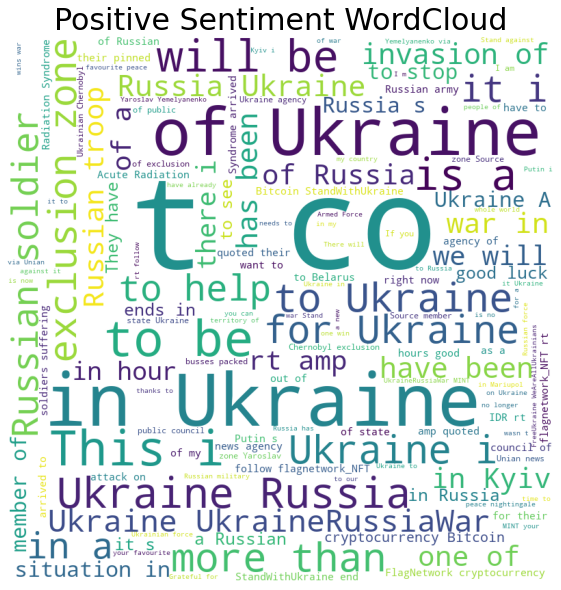

In [158]:
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Sentiment WordCloud',fontsize=30)
plt.tight_layout(pad = 0)
plt.savefig('positive_wordcloud.jpg')

In [166]:
big_string= df_neutral.text.str.cat(sep='')

In [167]:
stopwords = ['and','not','are mine','are the','around the','with','are','the','from','nan','just','you are',
            'views are','all the','since','what you','https']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

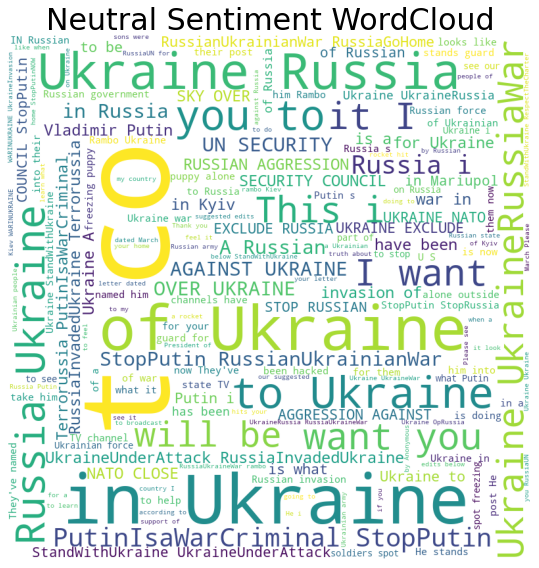

In [168]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Neutral Sentiment WordCloud',fontsize=30)
plt.tight_layout()
plt.savefig('neutral_wordcloud.jpg')

In [169]:
big_string= df_neutral.text.str.cat(sep='')

In [170]:
stopwords = ['and','not','are mine','are the','around the','with','are','the','from','nan','just','you are',
            'views are','all the','since','what you','https']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

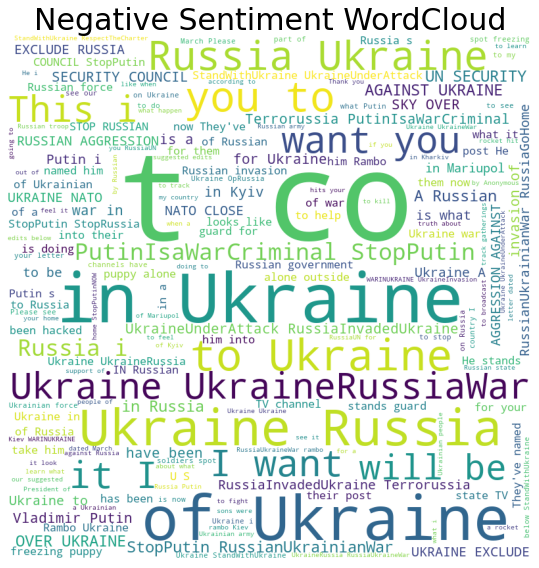

In [171]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Sentiment WordCloud',fontsize=30)
plt.tight_layout(pad = 0)
plt.tight_layout()
plt.savefig('negative_wordcloud.jpg')

In [172]:
df.columns

Index(['acctdesc', 'location', 'following', 'followers', 'totaltweets',
       'retweetcount', 'text', 'hashtags', 'coordinates', 'favorite_count',
       'extractedts', 'clean_text', 'clean_acct_desc', 'sentiment', 'polarity',
       'subjectivity', 'sentiment_val', 'date'],
      dtype='object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803473 entries, 0 to 344511
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   acctdesc         724138 non-null  object 
 1   location         803473 non-null  object 
 2   following        803473 non-null  int64  
 3   followers        803473 non-null  int64  
 4   totaltweets      803473 non-null  int64  
 5   retweetcount     803473 non-null  int64  
 6   text             803473 non-null  object 
 7   hashtags         803473 non-null  object 
 8   coordinates      94 non-null      object 
 9   favorite_count   803473 non-null  int64  
 10  extractedts      803473 non-null  object 
 11  clean_text       803473 non-null  object 
 12  clean_acct_desc  803473 non-null  object 
 13  sentiment        803473 non-null  object 
 14  polarity         803473 non-null  float64
 15  subjectivity     803473 non-null  float64
 16  sentiment_val    803473 non-null  int6

In [174]:
df.extractedts.value_counts()

2022-02-27 20:27:55.749272    2
2022-02-27 00:09:33.084131    1
2022-03-21 09:32:11.006091    1
2022-03-21 09:32:11.220139    1
2022-03-21 09:32:11.197929    1
                             ..
2022-02-28 21:31:49.794016    1
2022-02-28 21:31:49.772676    1
2022-02-28 21:31:49.694326    1
2022-02-28 21:31:49.687220    1
2022-03-31 23:43:57.795027    1
Name: extractedts, Length: 803472, dtype: int64

In [175]:
df['date'] = df.extractedts.str[:10]
df.date.value_counts()

2022-03-21    201263
2022-03-19    181289
2022-02-28    143638
2022-03-31    138519
2022-02-27    137362
2022-03-22       855
2022-03-20       547
Name: date, dtype: int64

/Users/nihaalz/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


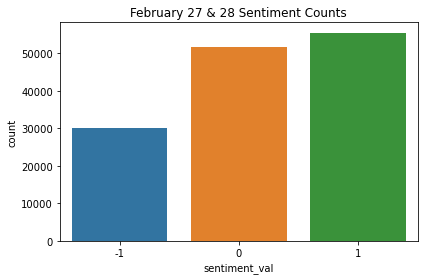

In [176]:
sns.countplot(df[df.date == ('2022-02-27' or '2022-02-28')].sentiment_val)
plt.title('February 27 & 28 Sentiment Counts')
plt.tight_layout()
plt.savefig('feb_counts.jpg')

/Users/nihaalz/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


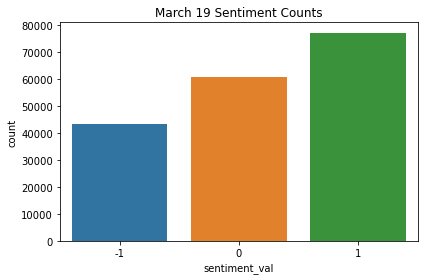

In [177]:
sns.countplot(df[df.date == ('2022-03-19' or '2022-03-20')].sentiment_val)
plt.title('March 19 Sentiment Counts')
plt.tight_layout()
plt.savefig('mar19_counts.jpg')

/Users/nihaalz/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


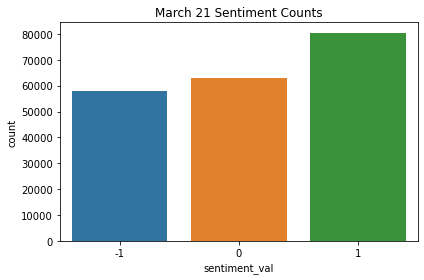

In [178]:
sns.countplot(df[df.date == ('2022-03-21' or '2022-03-22')].sentiment_val)
plt.title('March 21 Sentiment Counts')
plt.tight_layout()
plt.savefig('mar21_counts.jpg')

/Users/nihaalz/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


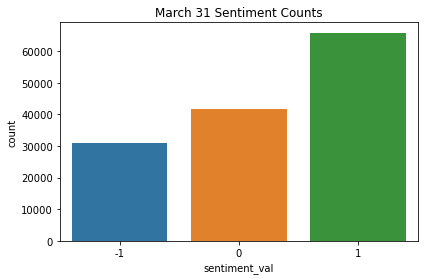

In [179]:
sns.countplot(df[df.date == '2022-03-31'].sentiment_val)
plt.title('March 31 Sentiment Counts')
plt.tight_layout()
plt.savefig('mar31_counts.jpg')

In [180]:
df[['text','clean_text']]

,text,clean_text
0,#UkraineRussiaWar Captured Russian soldiers\n\...,captured russian soldiers they said what thei...
4,Ukrainian soldiers wearing sunflowers in their...,ukrainian soldiers wearing sunflowers their ha...
5,russian troops destroyed a commercial oil base...,russian troops destroyed commercial oil base n...
8,Some scenes from #Kyiv this morning: The build...,some scenes from this morning the building lob...
9,Meanwhile American “intelligence” pretended an...,meanwhile american “intelligence” pretended em...
...,...,...
344502,I'll be joining @Lawrence tonight on @TheLastW...,joining tonight around 1030 discuss the appar...
344503,"We’ve lost already thousands of people killed,...",’ lost already thousands people killed ’ lost ...
344506,⚡The Ukrainian Air Force would like to address...,⚡the ukrainian air force would like address mi...
344507,"Amb. William Taylor, former U.S. Ambassador to...",amb william taylor former ambassador putin whe...


In [181]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    for tweet in textdata:


        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [182]:
import time
import nltk
# nltk.download('omw-1.4')
nltk.download('wordnet')
t = time.time()
processedtext = preprocess(df.clean_text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package wordnet to /Users/nihaalz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing complete.
Time Taken: 29 seconds


In [183]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(processedtext, df.sentiment_val,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [184]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


/Users/nihaalz/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [185]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [187]:
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)
ys_predict = KNNModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

KeyboardInterrupt: 

In [ ]:
DTCModel = DecisionTreeClassifier(random_state=0)
DTCModel.fit(X_train, y_train)
ys_predict = DTCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

In [ ]:
RFCModel = RandomForestClassifier(n_estimators=100)
RFCModel.fit(X_train, y_train)
ys_predict = RFCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

In [ ]:
X_train.shape

In [ ]:
y_train_d = keras.utils.to_categorical(y_train, 3)
y_test_d = keras.utils.to_categorical(y_test, 3)

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(500000,)))
model.add(Dense(units = 2, activation='relu'))
model.add(Dense(units = 3, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import scipy
X_train.sort_indices()
X_test.sort_indices()

In [ ]:
# TODO: Train the model for 20 epochs.
history = model.fit(
    X_train, y_train_d, epochs=20, verbose=1, validation_data=(X_test, y_test_d)
)